In [1]:
from dLSIpy import *
from biospeckle_tools_Gustavo import *
from Biospeckle_Gustavo import *


In [2]:
def Save_Act_Maps(MAP,OPT= [] ,lims=[0, 600]):
    import PIL,os
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as patches

    for t in range(MAP.shape[0]):
        
        if len(OPT) > 0:
            
            fig, ax = plt.subplots(1,2, figsize=(20,10))

            #mag = gaussian_filter(MAP[t],sigma=1)

            cs = ax[1].imshow(MAP[t], cmap='jet',vmin=lims[0],vmax=lims[1])

            cbar = fig.colorbar(cs)
            cbar.set_label('Activity Index')

            ax[1].set_title(Title[t],fontsize=15)
            #DATA= np.array(MAG, dtype=np.uint8)
            ax[1].axis('off')

            ax[0].imshow(OPT[t],cmap='gray')

            ax[0].axis('off')

            rect = patches.Rectangle((925,630),200,200,linewidth=1,edgecolor='r',facecolor='none', label='Sampled region')

            ax[0].add_patch(rect)

            ax[0].set_title(Title[t],fontsize=15)

            if t>32 & t<242:
                ax[0].text(830, -140, 'NIGHT', style='oblique',fontsize=15)

            else:
                ax[0].text(830, -140, 'DAY', style='oblique',fontsize=15)

            name= os.getcwd()+'\\MAPAS_ACTIVIDAD_OPT\\'

            if not os.path.exists(name):
                    os.makedirs(name)

            name = name +str(int(t)) + '.png'

            fig.suptitle('Motion History Imaging',fontsize=25)

            ax[0].legend()

            plt.savefig(name)

            plt.close()
            
        else:
            fig, ax = plt.subplots(1, figsize=(20,10))

            #mag = gaussian_filter(MAP[t],sigma=1)

            #cs = ax.imshow(MAP[t], cmap='jet',vmin=lims[0],vmax=lims[1])
            cs = ax.imshow(MAP[t], cmap='jet')
            
            cbar = fig.colorbar(cs)
            cbar.set_label('Activity Index')

            #ax.set_title(Title[t],fontsize=15)
            #DATA= np.array(MAG, dtype=np.uint8)
            ax.axis('off')
            
            name= os.getcwd()+'\\MAPAS_ACTIVIDAD_SIN_OPT\\'

            if not os.path.exists(name):
                    os.makedirs(name)

            name = name +str(int(t)) + '.png'

            fig.suptitle('Motion History Imaging',fontsize=25)

            plt.savefig(name)

            plt.close()

    return


In [28]:
MAPMHI = Analize_all_graph(method='MHI',NN=-1)
MAPIM = Analize_all_graph(method='IM',NN=-1)

Available folders
0 - Comparacion_pulvinus
1 - Descomponer
2 - Mapa_actividad
3 - Pulvinus_primario
4 - Pulvinus_primario_optico
5 - __pycache__


Elija una carpeta ingresando su numero (int): 3


['26_09_2020_05_06', '26_09_2020_05_16', '26_09_2020_05_26', '26_09_2020_05_37', '26_09_2020_05_47', '26_09_2020_05_57']
#Analizing  Pulvinus_primario//26_09_2020_05_06
#Analizing  Pulvinus_primario//26_09_2020_05_16
#Analizing  Pulvinus_primario//26_09_2020_05_26
#Analizing  Pulvinus_primario//26_09_2020_05_37
#Analizing  Pulvinus_primario//26_09_2020_05_47
#Analizing  Pulvinus_primario//26_09_2020_05_57
Available folders
0 - Comparacion_pulvinus
1 - Descomponer
2 - Mapa_actividad
3 - Pulvinus_primario
4 - Pulvinus_primario_optico
5 - __pycache__


Elija una carpeta ingresando su numero (int): 3


['26_09_2020_05_06', '26_09_2020_05_16', '26_09_2020_05_26', '26_09_2020_05_37', '26_09_2020_05_47', '26_09_2020_05_57']
#Analizing  Pulvinus_primario//26_09_2020_05_06
#Analizing  Pulvinus_primario//26_09_2020_05_16
#Analizing  Pulvinus_primario//26_09_2020_05_26
#Analizing  Pulvinus_primario//26_09_2020_05_37
#Analizing  Pulvinus_primario//26_09_2020_05_47
#Analizing  Pulvinus_primario//26_09_2020_05_57


In [29]:
import os 
import numpy as np

allfiles = os.listdir(os.getcwd())

Dirs = []

for i in allfiles:
    Dir = os.path.isdir(i)

    if Dir == True:
        if str('.') not in i:
            Dirs.append(i)

print('Available folders')

for i in range(0,len(Dirs)):
    print(i,'-',Dirs[i])

n = int(input('Elija una carpeta ingresando su numero (int):'))

allfiles=os.listdir(Dirs[n])

files = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
             if (str('.csv') not in i) and str('.txt') not in i:
                files.append(i.split('.')[0])

files=sorted(files)


Available folders
0 - Comparacion_pulvinus
1 - Descomponer
2 - Mapa_actividad
3 - Pulvinus_primario
4 - Pulvinus_primario_optico
5 - __pycache__


Elija una carpeta ingresando su numero (int): 3


In [30]:
from datetime import datetime
import pandas as pd

Date = pd.DataFrame(columns=['date'])

for i in range(len(files)):
    
    Date.loc[i] = files[i]
    #print(date)
    #Date[i] = datetime.strptime(date, '%d %m %Y %H %M')

DATE = pd.Series(pd.to_datetime(Date.date, format='%d_%m_%Y_%H_%M',dayfirst=True))


In [31]:
Tiempo = list([])

ESE = DATE.dt.day-DATE.dt.day[0]
HOUR = DATE.dt.strftime('%H')
MIN = DATE.dt.strftime('%M')

for n in range(len(DATE)):
    
    #SS = 'D'+ str(ESE[n]) + ' ' + str(HOUR[n]) + ':' + str(MIN[n])
    SS = str(HOUR[n]) + ':' + str(MIN[n])
    Tiempo.append(SS)


In [32]:
import scipy.io

name = 'Pulvino_primario_'+input('Enter a name to save the file: ')

scipy.io.savemat(name+'p_MHI.mat', {'IM': MAPIM, 'Tiempo':Tiempo})
scipy.io.savemat(name+'p_IM.mat', {'MHI': MAPMHI, 'Tiempo':Tiempo})


Enter a name to save the file:  0


In [57]:
import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

files = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('p_MHI.mat') in i:
                files.append(i)
files

['Pulvino_primario_00p_MHI.mat',
 'Pulvino_primario_01p_MHI.mat',
 'Pulvino_primario_02p_MHI.mat',
 'Pulvino_primario_03p_MHI.mat',
 'Pulvino_primario_04p_MHI.mat',
 'Pulvino_primario_05p_MHI.mat',
 'Pulvino_primario_06p_MHI.mat',
 'Pulvino_primario_07p_MHI.mat',
 'Pulvino_primario_08p_MHI.mat',
 'Pulvino_primario_09p_MHI.mat',
 'Pulvino_primario_10p_MHI.mat']

In [58]:
Mhi = scipy.io.loadmat(files[0])['MHI']
Tiempo = scipy.io.loadmat(files[0])['Tiempo']

for i in range(1,len(files),1):
        Mhi1 = scipy.io.loadmat(files[i])['MHI']
        T = scipy.io.loadmat(files[i])['Tiempo']
        
        Mhi = np.concatenate([Mhi,Mhi1])
        Tiempo = np.concatenate([Tiempo,T])
        

In [59]:
import scipy.io

name = 'Pulvino_primario_'+input('Enter a name to save the file: ')

scipy.io.savemat(name+'.mat', {'MHI': Mhi, 'Tiempo':Tiempo})


Enter a name to save the file:  Pulvino_primario_seguimiento_IM


In [4]:

def Sel_Method1(Data,DIR,AM='none'):
        '''Obtein the parameters of a ROI, opocite vertices point of a rectangle and the center point (X,Y)'''
        import cv2,os
        import numpy as np
        
        if AM !='none':
            
            uint_img = np.array(Data).astype(np.uint16)

            im = uint_img
        
        else:
            
            if DIR!='':

                allfiles=os.listdir(os.getcwd()+'\\'+ DIR)

            else:
                allfiles=os.listdir(os.getcwd())

                print('We will work with the images in',os.getcwd())

            #Crea una lista con todos los archivos de allfiles con extension bmp
            oimlist=[filename for filename in allfiles if  filename[-4:] in [".bmp",".BMP"]]

            #Ordenar las imagenes de manera ascendente
            oimlist=sorted(oimlist,key=lambda f: int(''.join(filter(str.isdigit, f))))

            #####################################################
            #Abre y carga las imagenes
            im = cv2.imread(os.getcwd()+'\\'+ DIR + '\\' + oimlist[5])
        
        r = []
        
        #Toma la resolución de la primera imagen de la lista
        w,h = Data.shape
        
        #Reajustar imagen si la resolucion es muy grande y no entrara en pantalla
        if w>1500:        
            f=4
        
        elif w>1000:
            f=2
        
        else:
            f=1

        res=[int(w/f),int(h/f)]

        # Crea una dupla con la resolución reajustada
        res=[w/f,h/f]

        #Redefine el tamaño de la imagen para mostrar posteriormente en pantalla y solicitar la seleccion de la region de interes
        imS = cv2.resize(im, (int(res[1]), int(res[0]))) 

        ######################################################
        #SELECCION DE LA REGION DE INTERES
        ######################################################
        print('\n')
        print('Select a region of interest, confirm it pressing enter twice')

    # Solicita la selección de la región de interes
        r = cv2.selectROI(imS)
        
        #Cierran las ventanas donde se abrio la ROI selector
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    #Redefine la región seleccionada para las resolución original de las imágenes
        r=[f*r[0],f*r[1],f*r[2],f*r[3]]
        
        X,Y = int(np.round(r[0]+0.5*r[2])),int(np.round(r[1]+.5*r[3]))
        
        Ra = int(input('Introduce the radio of the analysis region (int): '))
        
        return X,Y,Ra
    

In [5]:
def Analize_all_num():
    
    import os, cv2
    import matplotlib.pyplot as plt
    import numpy as np

    allfiles = os.listdir(os.getcwd())

    Dirs = []

    for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir == True:
            if str('.') not in i:
                Dirs.append(i)

    print('Available folders')

    for i in range(0,len(Dirs)):
        print(i,'-',Dirs[i])

    n = int(input('Elija una carpeta ingresando su numero (int):'))

    allfiles=os.listdir(Dirs[n])

    files = []

    for i in allfiles:
            Dir = os.path.isdir(i)

            if Dir != True:
                if str('.') not in i:
                    files.append(i)
    
    files=sorted(files)
    
    for i in range(0,len(files)):
        print(i,'-',files[i])
    
    Value = np.zeros(len(files))
        
    for i in range(len(files)):

        DIR = Dirs[n] + '//' + files[i]
        
        print(DIR)
        
        data= datapack(DIR)

        if i==0:

            X,Y,R = Sel_Method1(graphmhi(data,15),DIR)

        Show_ROI(data,X,Y,R)

        proceed = input('Is the ROI ok?')

        while proceed not in ['y','YES','Y']:

            X,Y,R = Sel_Method1(graphmhi(data,15),DIR)

            Show_ROI(data,X,Y,R)
            
            proceed = input('Is the ROI ok?')

        Value[i] = np.sum(graphmhi(data[:,X-R:X+R,Y-R:Y+R],15))/(R**2)

        print('Completed',str(i)+'/'+str(len(files)))            

    return Value

def Show_ROI(data,X,Y,R):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig,ax = plt.subplots()

    ax.imshow(graphmhi(data,15),cmap='jet')
    
    rect = patches.Rectangle((X-R,Y-R),2*R,2*R,linewidth=1,edgecolor='r',facecolor='none', label='Sampled region')

    ax.add_patch(rect)
    
    plt.show()
    
    return
   

In [65]:
#MHIdatos = Analize_all_num()

MAPMHI = scipy.io.loadmat('Pulvino_primario_seguimiento_MHI.mat')['MHI']
Tiempo = scipy.io.loadmat('Pulvino_primario_seguimiento_MHI.mat')['Tiempo']


MAPMHI.shape

(63, 538, 818)

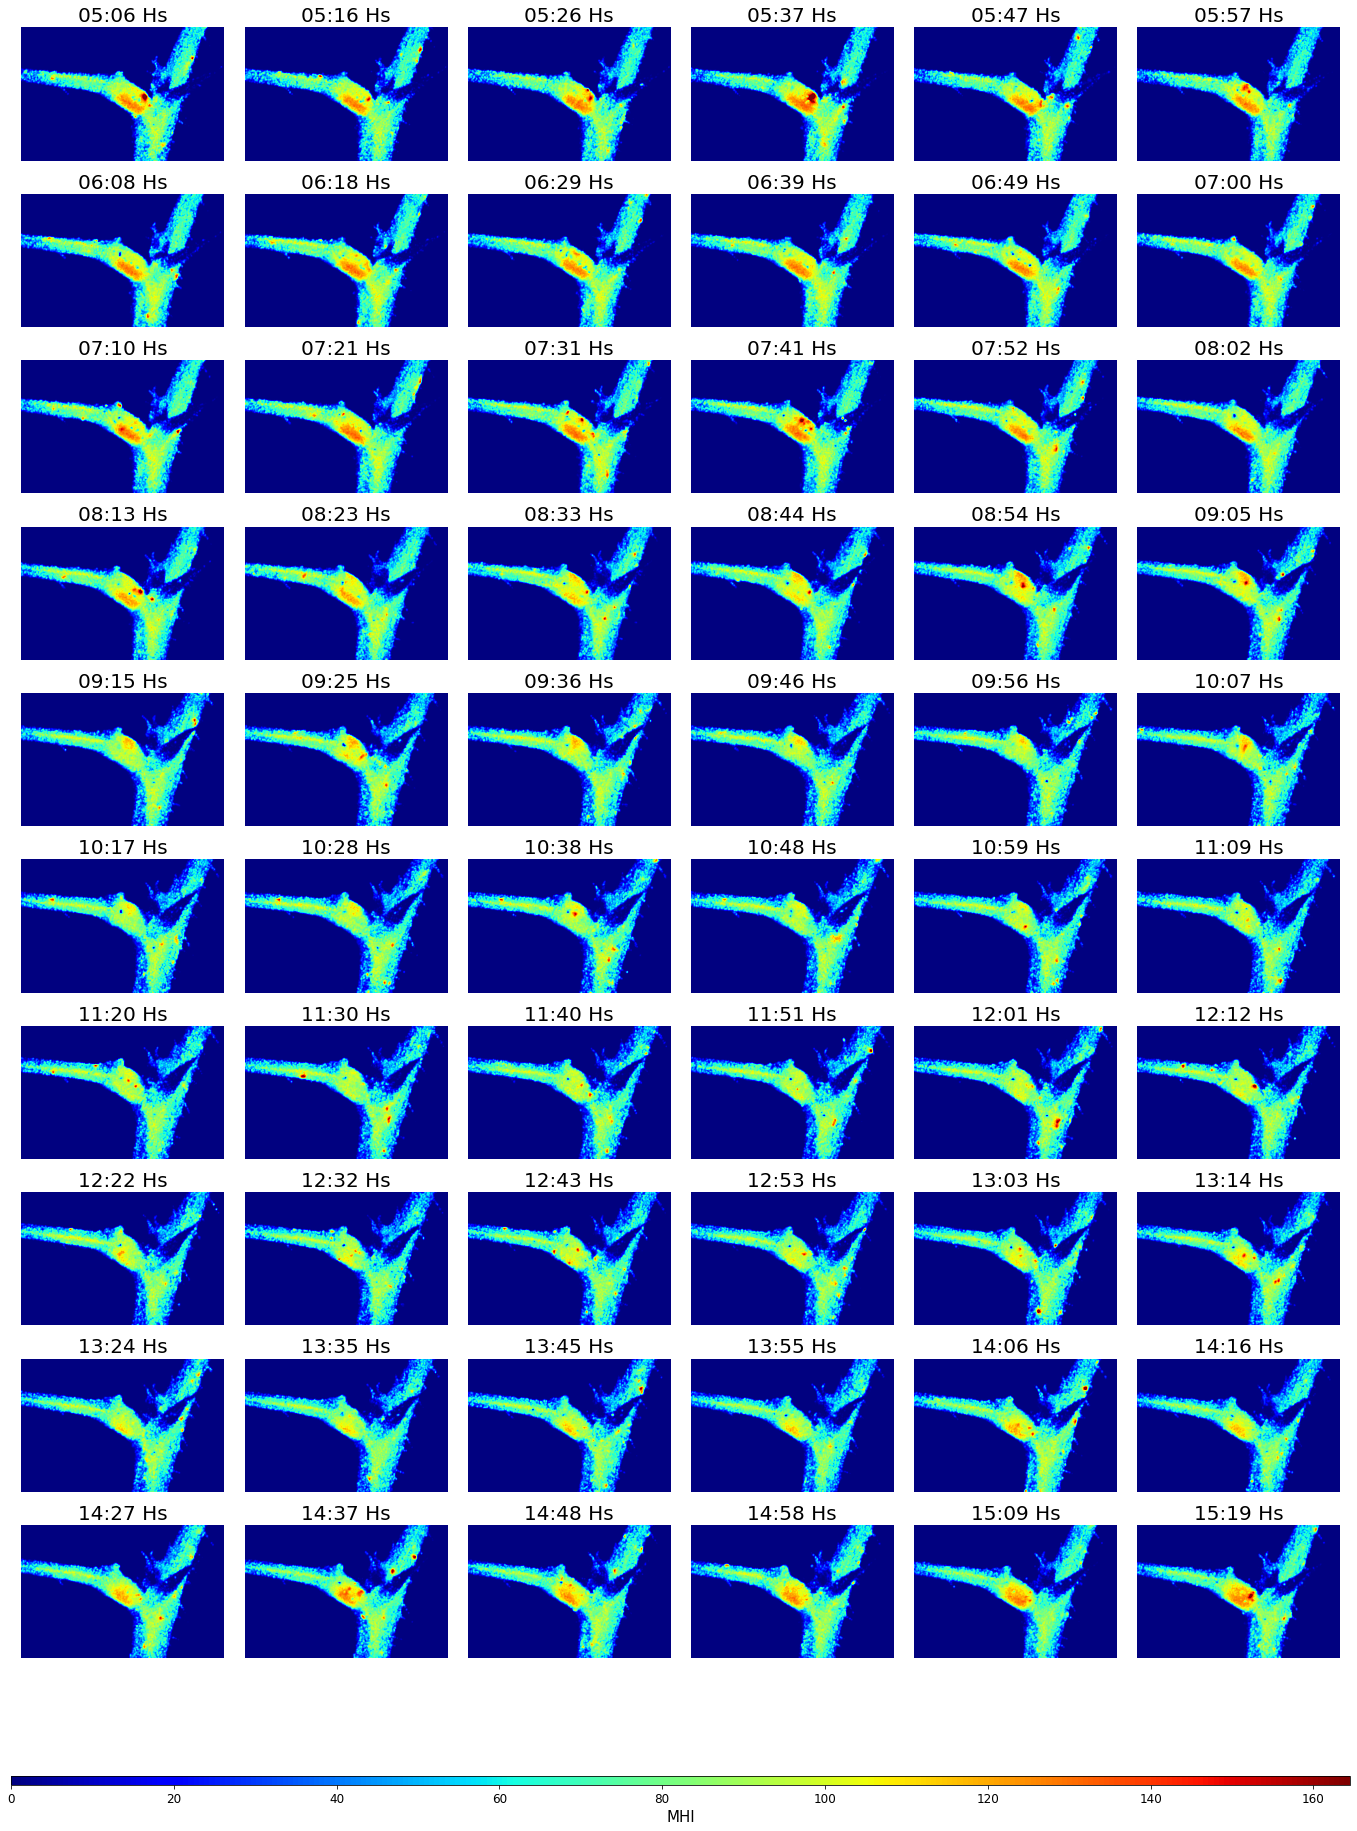

In [70]:
import matplotlib.pyplot as plt
from matplotlib import colors

k,l = 10,6

plt.rcParams["figure.figsize"] = (4*l,4*k)

fig, ax = plt.subplots(k,l)

images = []   

#THR = 10

vmax = np.max(MAPMHI[6])
vmin = np.min(MAPMHI[6])


for i in range(k):
    
    for j in range(l):
        
        #data = datapack(Drr+allfiles[j+l*i])
        #images.append(axs[i,j].imshow(maP[j+l*i],cmap='nipy_spectral'))
        images.append(ax[i,j].imshow(MAPMHI[j+l*i],vmin=vmin,vmax=vmax,cmap='jet',interpolation='gaussian',alpha=3))
        ax[i,j].axis('off')
        ax[i,j].label_outer()

        ax[i,j].set_title(Tiempo[j+l*i]+str(' Hs'),fontsize=20)

"""
# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)

#Will use the first image as criteria for colormap limits
#vmin = images[0].get_array().min()
#vmax = images[0].get_array().max()

#norm = colors.Normalize(vmin=vmin, vmax=vmax)

for im in images:
    im.set_norm(norm)

Ticks = np.arange(vmin,vmax,20)
    
cm = fig.colorbar(images[0], ax=ax,ticks=Ticks, orientation='horizontal',fraction=0.1,aspect=150,anchor=(50,-.8))

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!

def update(changed_image):
    
    for im in images:
    
        if (changed_image.get_cmap() != im.get_cmap()
        
                or changed_image.get_clim() != im.get_clim()):
            
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)

"""
fig.subplots_adjust( # the top of the subplots of the figure
wspace = 0,  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.25,  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
)

cm = fig.colorbar(images[0], ax=ax, orientation='horizontal',fraction=0.1,aspect=150,anchor=(50,2))

cm.ax.tick_params(labelsize=12)
cm.set_label('MHI',fontsize=15)
#plt.suptitle('WAVELET TRANSFORM DECOMPOSITION',fontsize=25)

# = input('Parte de la planta')

#plt.savefig(Nparte+'_monitoreo.png',dpi=200,box_inches='tight')

plt.show()

plt.clf()

plt.close()


In [103]:
import os 

import numpy as np

allfiles = os.listdir(os.getcwd())

Dirs = []

for i in allfiles:
    Dir = os.path.isdir(i)

    if Dir == True:
        if str('.') not in i:
            Dirs.append(i)

print('Available folders')

for i in range(0,len(Dirs)):
    print(i,'-',Dirs[i])

n = int(input('Elija una carpeta ingresando su numero (int):'))

OPT = datapack(Dirs[n],ni=0)


Available folders
0 - Comparacion_pulvinus
1 - Descomponer
2 - Mapa_actividad
3 - Pulvinus_primario
4 - Pulvinus_primario_optico
5 - __pycache__


Elija una carpeta ingresando su numero (int): 4


In [105]:
OPT.shape[0]-MAPMHI[6:].shape[0]

range(6,MAPMHI.shape[0]-5,1)

OPT[60:].shape

(57, 1080, 1920)

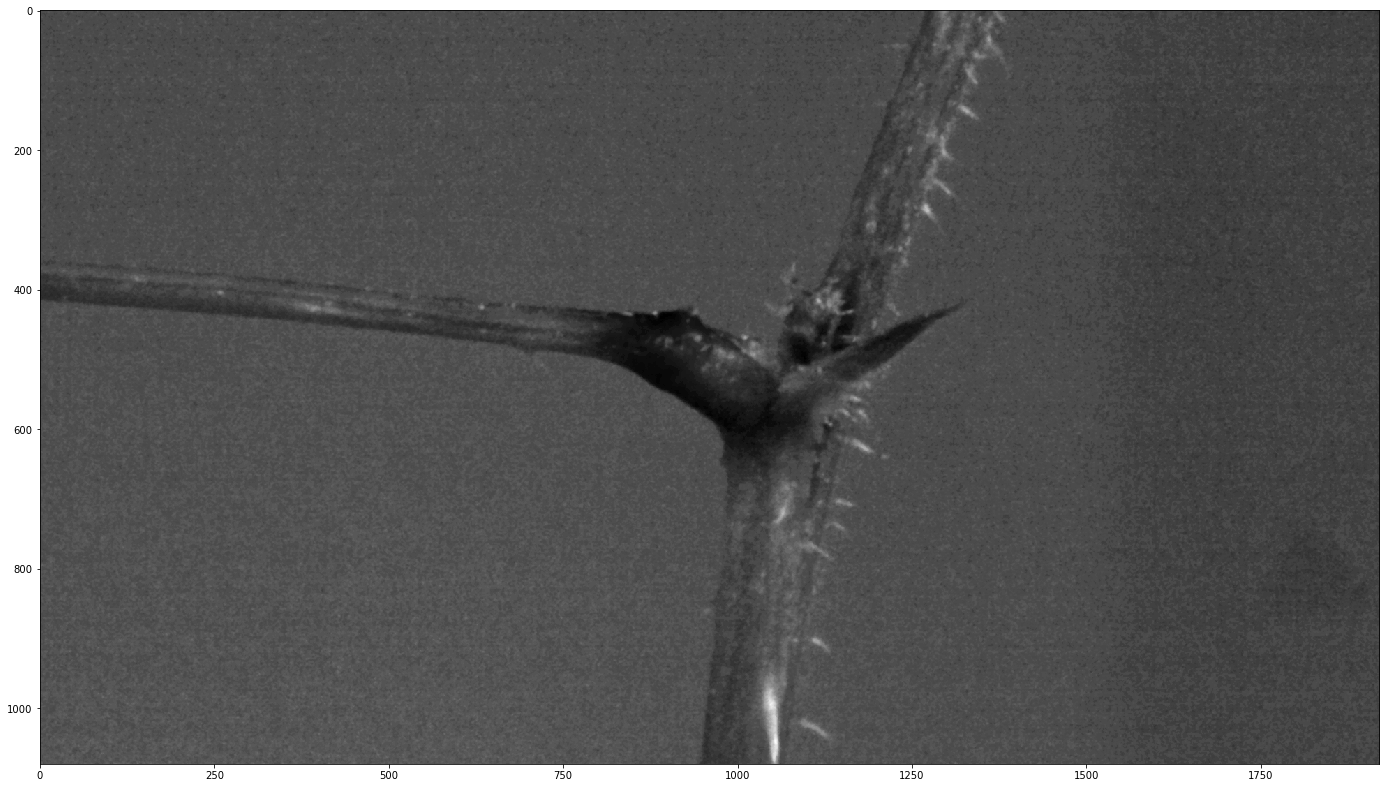

In [72]:
plt.imshow(OPT[60],cmap='gray')

(63, 538, 818)


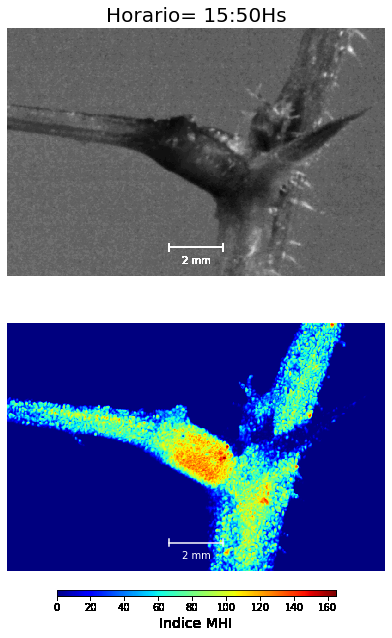

In [109]:
#vmax=np.max(MAPMHI[0])
#print(vmax)
import matplotlib.pyplot as plt
import matplotlib.offsetbox
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.font_manager as fm

fig,ax = plt.subplots(figsize=(20,10))

ni = 60
print(MAPMHI.shape)

vmax = np.max(MAPMHI[6])
vmin = np.min(MAPMHI[6])

direc='Mapa_actividad/'

if not os.path.exists(direc):
        
        os.makedirs(direc)
        
for i in range(6,MAPMHI.shape[0],1):
    
    ax.imshow(OPT[ni+i-6][240:240+538,520:520+818],cmap='gray')

    divider = make_axes_locatable(ax)
    
    ax2 = divider.append_axes("bottom", size=4, pad=0.1)
    
    cs = ax2.imshow(MAPMHI[i],vmin=vmin,vmax=vmax,cmap='jet')

    ax.axis('off')
    ax2.axis('off')

    cm = fig.colorbar(cs,ax=ax2,orientation='horizontal',fraction=0.1,shrink=0.25,aspect=50,anchor=(0.5,-.5))

    cm.set_label(r'Indice MHI',fontsize=14)

    fontprops = fm.FontProperties(size=10)

    """def add_sizebar(ax, psize, rsize, color = 'white'):
        asb = AnchoredSizeBar(ax.transData,
                              psize,
                              str(rsize),
                              loc=8,
                              pad=0.5, borderpad=0.5, sep=5, color=str(color),
                              frameon=False,fontproperties=fontprops)
        ax.add_artist(asb)

    add_sizebar(ax[0], 118, '2 mm')"""

    class AnchoredHScaleBar(matplotlib.offsetbox.AnchoredOffsetbox):
        """ size: length of bar in data units
            extent : height of bar ends in axes units """
        def __init__(self, size=1, extent = 0.03, label="", loc=2, ax=None,
                     pad=0.4, borderpad=0.5, ppad = 0, sep=2, prop=None, 
                     frameon=True, linekw={}, **kwargs):
            if not ax:
                ax = plt.gca()
            trans = ax.get_xaxis_transform()
            size_bar = matplotlib.offsetbox.AuxTransformBox(trans)
            line = Line2D([0,size],[0,0], **linekw)
            vline1 = Line2D([0,0],[-extent/2.,extent/2.], **linekw)
            vline2 = Line2D([size,size],[-extent/2.,extent/2.], **linekw)
            size_bar.add_artist(line)
            size_bar.add_artist(vline1)
            size_bar.add_artist(vline2)
            txt = matplotlib.offsetbox.TextArea(label,minimumdescent=False,textprops=dict(color="white"))
            self.vpac = matplotlib.offsetbox.VPacker(children=[size_bar,txt],  
                                     align="center", pad=ppad, sep=sep) 
            matplotlib.offsetbox.AnchoredOffsetbox.__init__(self, loc, pad=pad, 
                     borderpad=borderpad, child=self.vpac,prop=prop, frameon=frameon,
                     **kwargs)

    ob = AnchoredHScaleBar(size=118, label="2 mm", loc=8, frameon=False,
                           pad=0.6,sep=4, linekw=dict(color="white"),) 
    ax.add_artist(ob)

    ob2 = AnchoredHScaleBar(size=118, label="2 mm", loc=8, frameon=False,
                           pad=0.6,sep=4, linekw=dict(color="white"),) 
    ax2.add_artist(ob2)

    ax.set_title(str('Horario= ')+Tiempo[i]+'Hs',fontsize=20)

    plt.savefig(direc+str(i-6)+'.png',dpi=100,box_inches='tight')


In [ ]:
Escala = 1.7e-5
PIX= 2e-3/Escala

In [14]:
PulAbajo = datapack('Comparacion_pulvinus//26_09_2020_06_49')[1:]

PulArri = datapack('Comparacion_pulvinus//26_09_2020_09_46')[1:]



In [15]:
import cv2

OPTAbaj = cv2.imread('Comparacion_pulvinus//26_09_2020_06_49.bmp')

OPTArri = cv2.imread('Comparacion_pulvinus//26_09_2020_09_46.bmp')


In [16]:
ArrMHI = graphmhi(PulArri,15)

AbaMHI = graphmhi(PulAbajo,15)

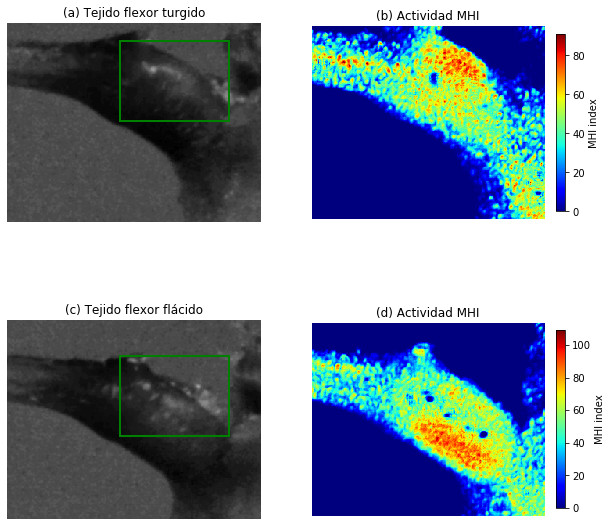

In [18]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].imshow(OPTArri[375:650,750:1100])

cs1= ax[0,1].imshow(ArrMHI,cmap='jet')

ax[1,0].imshow(OPTAbaj[375:650,750:1100])

cs2 = ax[1,1].imshow(AbaMHI,cmap='jet')

cm = fig.colorbar(cs1,ax=ax[0,1],fraction=.035)

cm.set_label(r'MHI index')


cm2 = fig.colorbar(cs2,ax=ax[1,1],fraction=.035)

cm2.set_label(r'MHI index')

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

import matplotlib.patches as patches

rect = patches.Rectangle((155,25),150,110,linewidth=2,edgecolor='g',facecolor='none', label='Sampled region')

ax[0,0].add_patch(rect)

ax[0,0].set_title('(a) Tejido flexor turgido')
ax[0,1].set_title('(b) Actividad MHI')

ax[1,0].set_title('(c) Tejido flexor flácido')
ax[1,1].set_title('(d) Actividad MHI')

rect2 = patches.Rectangle((155,50),150,110,linewidth=2,edgecolor='g',facecolor='none', label='Sampled region')

ax[1,0].add_patch(rect2)

plt.savefig('Dinamica_pulvinus_primario.png',dpi=200)


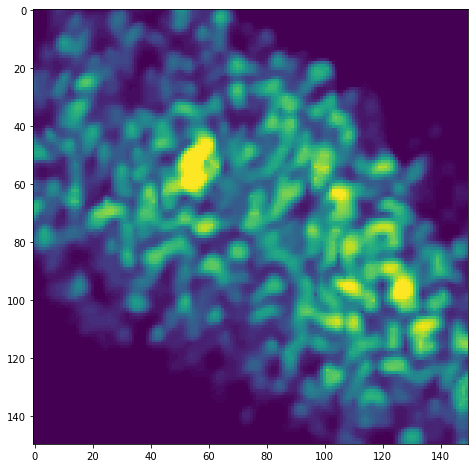

In [76]:
import matplotlib.pyplot as plt

plt.imshow(PulArri[0,15:165,100:250])


In [77]:
#PulArri = datapack('Comparacion_pulvinus//26_09_2020_09_46')[1:]
PulAbajo = datapack('Comparacion_pulvinus//26_09_2020_06_49')[1:]

#dt = 60/PulAbajo.shape[0]
dt = 60/PulArri.shape[0]

#dt = 0.08
#NN = 2**int(np.log2(data.shape[0]))

NN = 256

#Pul primario
#DATA = data[:NN,100:325,150:350]

#Pul secu
#DATA = data[:NN,70:300,120:340]

#Pul Tallo
#DATA = PulAbajo[:NN,50:200,100:250]

DATA = PulArri[:NN,15:165,100:250]

#Peciolo
#DATA=data[:NN,:,90:175]

#DATA = data[:NN]

#DATA[DATA<1] = 1

cw,s = CWT(DATA,dt=dt)

#freq = Wavelet_Blocks(DATA,wx=20,wy=20,dt=dt,Dir=Dirs[n])


In [78]:

w0 = 6

freq = 1/(4 *np.pi*s/(w0 + (2 + w0 ** 2)**.5))

DomT = np.max(freq)

Fint = 2

Nn = int(DomT/Fint)+1

Freqlist = []

Scallist = []

slist = []

for n in range(Nn):

    sp = np.where((freq>=n*Fint)&(freq<(n+1)*Fint))[0]
    
    if len(sp)>0:
        
        Freqlist.append(freq[sp])
        Scallist.append(s[sp])
        slist.append(sp)

Scallist


[array([0.50232042, 0.5477843 , 0.59736302, 0.65142899, 0.71038835,
        0.77468399, 0.84479888, 0.92125971, 1.00464084, 1.0955686 ,
        1.19472603, 1.30285798, 1.4207767 , 1.54936798, 1.68959776,
        1.84251942, 2.00928168, 2.19113721, 2.38945207, 2.60571596,
        2.8415534 , 3.09873596, 3.37919552, 3.68503885, 4.01856336,
        4.38227442, 4.77890414, 5.21143192, 5.6831068 , 6.19747192,
        6.75839105, 7.3700777 , 8.03712672]),
 array([0.25116021, 0.27389215, 0.29868151, 0.32571449, 0.35519418,
        0.38734199, 0.42239944, 0.46062986]),
 array([0.16285725, 0.17759709, 0.193671  , 0.21119972, 0.23031493]),
 array([0.1255801 , 0.13694608, 0.14934075]),
 array([0.0968355 , 0.10559986, 0.11515746]),
 array([0.08142862, 0.08879854]),
 array([0.07467038]),
 array([0.06279005, 0.06847304])]

In [9]:

Wavelet_reconstruct_with_saving(cw,DATA,dt,Freqlist,Scallist,slist,Dir=Dirs[n])


Reconstrucion on Band 0  completed
Reconstrucion on Band 1  completed
Reconstrucion on Band 2  completed
Reconstrucion on Band 3  completed
Reconstrucion on Band 4  completed
Reconstrucion on Band 5  completed
Reconstrucion on Band 6  completed
Reconstrucion on Band 7  completed


In [10]:
j = 0

print(freq[slist[j]])

DAT = Reconstruction(cw, DATA, dt, 0, Scallist[j],slist=slist[j])

#DAT = Reconstruction(cw, data[:NN], dt, 0, s)

DAT = np.array(DAT,dtype=np.uint8)

IM = graphim(data[:NN])
IMD = graphim(DAT,10)
vmin = np.min(IMD)
vmax = np.max(IMD)


[1.959375   1.7967548  1.64763141 1.51088467 1.38548735 1.2704975
 1.16505135 1.06835679 0.9796875  0.8983774  0.82381571 0.75544233
 0.69274367 0.63524875 0.58252567 0.5341784  0.48984375 0.4491887
 0.41190785 0.37772117 0.34637184 0.31762438 0.29126284 0.2670892
 0.24492188]


In [79]:
DATOSPUTOS = []
FLims = []

for j in range(len(slist)):

    print(freq[slist[j]])

    DAT = Reconstruction(cw, DATA, dt, 0, s[slist[j]],slist=slist[j])

    DAT = np.array(DAT,dtype=np.uint8)

    #DAT[DAT<1]=0

    #EXTR = np.mean(DAT)+13*np.std(DAT)

    #DAT[DAT>EXTR]=0

    DATOSPUTOS.append(DAT)
    
    Fmax = np.round(np.max(Freqlist[j]),2)

    Fmin = np.round(np.min(Freqlist[j]),2)

    FLims.append(str(Fmin) + '-' + str(Fmax) + ' Hz')



[1.92708333 1.76714321 1.62047747 1.48598439 1.36265369 1.24955895
 1.14585061 1.05074964 0.96354167 0.8835716  0.81023873 0.74299219
 0.68132685 0.62477947 0.5729253  0.52537482 0.48177083 0.4417858
 0.40511937 0.3714961  0.34066342 0.31238974 0.28646265 0.26268741
 0.24088542 0.2208929  0.20255968 0.18574805 0.17033171 0.15619487
 0.14323133 0.1313437  0.12044271]
[3.85416667 3.53428642 3.24095493 2.97196878 2.72530739 2.49911789
 2.29170121 2.10149928]
[5.94393756 5.45061477 4.99823578 4.58340242 4.20299855]
[7.70833333 7.06857283 6.48190987]
[9.99647157 9.16680484 8.40599711]
[11.88787511 10.90122954]
[12.96381974]
[15.41666667 14.13714567]


In [97]:
def fujii(data):
    
    m = data.shape[0]
    
    F = np.zeros([data.shape[1],data.shape[2]])
    
    for i in range(m-1):
        
        F = (data[i]-data[i+1])/(data[i]+data[i+1]+1e-3) + F
    
    F = F*200/(m-1)
    
    return F


Parte de la planta Pulvinoprimario_flexorturgido


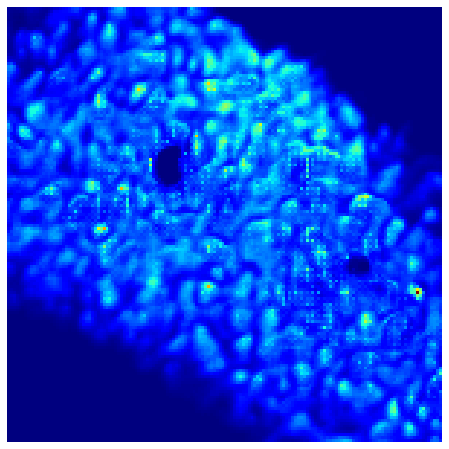

In [99]:

THR = 15

ORIG = graphmhi(DATA,THR)

ORIG = graphim(DATA)

#ORIG = fujii(DATA)


vmin=np.min(ORIG)
vmax=np.max(ORIG)

plt.imshow(ORIG,cmap='jet',vmin=vmin,vmax=vmax)

plt.axis('off')

Nparte = input('Parte de la planta')

plt.savefig(Nparte+'_original.png',dpi=100)

#Pulvinoprimario_flexorturgido


In [83]:
np.max(ORIG)

116.6875

52 79


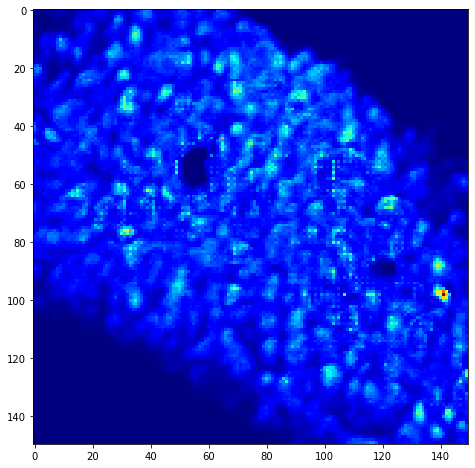

In [82]:
data = DATOSPUTOS[7]
        
print(np.min(data),np.max(data))
    
MHI = graphim(data)

plt.imshow(MHI,cmap='jet')

28.058823529411764
40.98039215686274
39.976470588235294
30.211764705882352
35.48627450980392
25.91372549019608
10.188235294117646
37.6


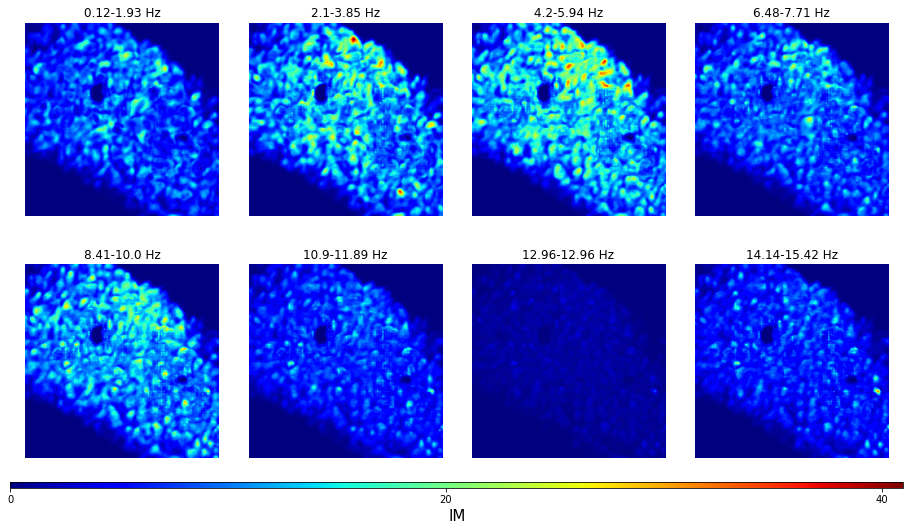

In [100]:
import matplotlib.pyplot as plt
from matplotlib import colors

k,l = 2,4

plt.rcParams["figure.figsize"] = (4*l,4*k)

fig, ax = plt.subplots(k,l)

images = []   

THR = 4

for i in range(k):
    
    for j in range(l):
        
        #data = datapack(Drr+allfiles[j+l*i])
        data = DATOSPUTOS[j+l*i]
        
        MHI = graphmhi(data,THR)
        
        MHI = graphim(data)

        print(np.max(MHI))
        
        #images.append(axs[i,j].imshow(maP[j+l*i],cmap='nipy_spectral'))
        images.append(ax[i,j].imshow(MHI,cmap='jet',interpolation='gaussian',alpha=3))
        ax[i,j].axis('off')
        ax[i,j].label_outer()

        ax[i,j].set_title(FLims[j+l*i])

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)

#Will use the first image as criteria for colormap limits
#vmin = images[0].get_array().min()
#vmax = images[0].get_array().max()

norm = colors.Normalize(vmin=vmin, vmax=vmax)

for im in images:
    im.set_norm(norm)

Ticks = np.arange(vmin,vmax,20)
    
cm = fig.colorbar(images[0], ax=ax,ticks=Ticks, orientation='horizontal',fraction=0.1,aspect=150,anchor=(50,-.8))

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!

def update(changed_image):
    
    for im in images:
    
        if (changed_image.get_cmap() != im.get_cmap()
        
                or changed_image.get_clim() != im.get_clim()):
            
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)


fig.subplots_adjust( # the top of the subplots of the figure
wspace = 0,  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.25,  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
)

cm.set_label('IM',fontsize=15)
#plt.suptitle('WAVELET TRANSFORM DECOMPOSITION',fontsize=25)

#Nparte = input('Parte de la planta')

plt.savefig(Nparte+'_descomposicion.png',dpi=200)

plt.show()

plt.clf()

plt.close()


In [ ]:
def Extract_all():
    import os 
    from shutil import copyfile

    import numpy as np

    allfiles = os.listdir(os.getcwd())

    Dirs = []

    for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir == True:
            if str('.') not in i:
                Dirs.append(i)

    print('Available folders')

    for i in range(0,len(Dirs)):
        print(i,'-',Dirs[i])

    n = int(input('Elija una carpeta ingresando su numero (int):'))

    allfiles=os.listdir(Dirs[n])

    files = []

    for i in allfiles:
            Dir = os.path.isdir(i)

            if Dir != True:
                 if (str('.csv') not in i) and str('.txt') not in i:
                    files.append(i)
    
    files=sorted(files)
    
    name = Dirs[n] + '_optico'
    
    if not os.path.exists(name):
        os.makedirs(name)
    
    
    for i in range(len(files)):

        DIR = Dirs[n] + '//' + files[i] + '//0.bmp'
        
        copyfile(DIR, name+'//'+str(files[i])+'.bmp')
        
    return 